# Movie Revenue Project

By: Will Byrd
Email: byrdwcrawford@gmail.com
Linkedin: https://www.linkedin.com/in/will-byrd-40323863/
Wordpress: blog33497.wordpress.com

## Business Understanding
In this hypothetical scenario, our company has decided to expand into content creation, i.e. films.  We will analyze over 100 years of film data to determine indicators of success and offer this consultation to our company.

We define success as: 
* total gross
* total profit
* ROI
 
Cue's to movie success we will consider are:
* runtime
* budget
* year produced
* genre


This Project utilizes the following datasets:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomaotes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)


We have over 100 years of film data from multiple datasets.  To get started, we will explore the datasets indivdually and consolidate the important columns.

## Initial EDA
Loading the datasets as individual df's to clean and prepare columns for analysis.  Once we determine which columns we will use, they can then be joined together for analysis.  It's important that we do this now, so we don't run into issues performin regression analysis and creatong visuals.

In [1]:
#First things first, import all necessary libraries for data analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

import scipy.stats as stats
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### creating <u>df_movies</u> to view tmdb.movies.csv

In [2]:
df_movies = pd.read_csv('data/tmdb.movies.csv',
                 index_col=0,       
                 encoding='ISO-8859-1',
                 low_memory=False,
                 dtype=str)  
# Sort the DataFrame by the 'title' column in alphabetical order
df_movies_sorted = df_movies.sort_values(by='title', ascending=True)

# Display the first sorted few rows of DataFrame
df_movies_sorted.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26355,"[99, 12]",564096,en,"""BLESSED""",0.6,2018-11-23,"""BLESSED""",7.0,1
7815,"[35, 80]",283543,en,"""Legitimate Rape"" Pharmaceutical Ad",0.6,2012-08-28,"""Legitimate Rape"" Pharmaceutical Ad",2.3,2
12812,[99],263765,en,"""cherry"" - Supreme",0.893,2014-03-20,"""cherry"" - Supreme",10.0,1
577,"[35, 18]",41371,en,#1 Cheerleader Camp,3.277,2010-07-27,#1 Cheerleader Camp,3.6,34
16037,[99],368247,en,#ALLMYMOVIES,0.84,2015-11-12,#ALLMYMOVIES,9.0,4


Inspecting df_movies info, cleaning up data slightly

In [3]:
df_movies.info()
#striping away white spaces
df_movies.columns = df_movies.columns.str.strip()
#counting all nan values
df_movies.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genre_ids          26517 non-null  object
 1   id                 26517 non-null  object
 2   original_language  26517 non-null  object
 3   original_title     26517 non-null  object
 4   popularity         26517 non-null  object
 5   release_date       26517 non-null  object
 6   title              26517 non-null  object
 7   vote_average       26517 non-null  object
 8   vote_count         26517 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

### creating <u>df_budget</u> to view movie_budgets.csv

In [4]:
df_budget = pd.read_csv('data/tn.movie_budgets.csv',
                 index_col=0,
                 encoding='ISO-8859-1',
                 low_memory=False,
                 dtype=str)  
df_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Inspecting df-budget,removing white spaces and counting all NAN calues

In [5]:
df_budget.info()
df_budget.columns = df_budget.columns.str.strip()
df_budget.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### creating <u>df_gross</u> to view movie_gross.csv

In [6]:
df_gross = pd.read_csv('data/bom.movie_gross.csv',
                 index_col=0,
                 encoding='ISO-8859-1',
                 low_memory=False,
                 dtype=str)  
df_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


Inspecting df_gross, removing whitespaces

In [7]:
df_gross.info()
df_gross.columns = df_gross.columns.str.strip()
df_gross.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   studio          3382 non-null   object
 1   domestic_gross  3359 non-null   object
 2   foreign_gross   2037 non-null   object
 3   year            3387 non-null   object
dtypes: object(4)
memory usage: 132.3+ KB


studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### creating <u>df_rt</u> to view rt.movie_info.tsv

In [8]:
df_rt = pd.read_csv('data/rt.movie_info.tsv',
                  index_col=0,
                  delimiter='\t',
                  encoding='ISO-8859-1',
                  low_memory=False,
                  dtype=str,
                  error_bad_lines=False)  
df_rt.head()


,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Inspecting df_rt, removing whitespaces

In [9]:
df_rt.info()
df_rt.columns = df_rt.columns.str.strip()
df_rt.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

### creating <u>df_reviews</u> to view rt.reviews.tsv

In [10]:
df_reviews = pd.read_csv('data/rt.reviews.tsv',
                  index_col=0,
                  delimiter='\t',
                  encoding='ISO-8859-1',
                  low_memory=False,
                  dtype=str,
                  error_bad_lines=False)  
df_reviews.head()


,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Inspecting df_reviews, removing whitespaces

In [11]:
df_reviews.info()
df_reviews.columns = df_reviews.columns.str.strip()
df_reviews.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  object
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: object(7)
memory usage: 3.3+ MB


review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

inspecting 'domestic_gross' column

In [12]:
df_budget['domestic_gross']

id
1     $760,507,625
2     $241,063,875
3      $42,762,350
4     $459,005,868
5     $620,181,382
          ...     
78              $0
79         $48,482
80          $1,338
81              $0
82        $181,041
Name: domestic_gross, Length: 5782, dtype: object

The dtype:object and inclusion of dollar signs and commas will make this data difficult to analyse.  It needs to be cleaned and set as dtype:int.  We will need to create a for loop to remove the dollar sign and commas from each row within this colum.

In [13]:
# Removing extra characters in domestic_gross to convert to numerice type
# Remove the first character from the values in the 'domestic_gross' column
for col in df_budget.columns:
    # Check if the column contains dollar signs
    if df_budget['domestic_gross'].dtype == 'object' and '$' in df_budget['domestic_gross'].iloc[0]:
        # Replace the dollar signs with an empty string
        df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '')

# Remove commas and modify the original DataFrame in place
df_budget['domestic_gross'].replace(',','', regex=True, inplace=True)

# Check the first few rows to verify the change
print(df_budget['domestic_gross'].head())


id
1    760507625
2    241063875
3     42762350
4    459005868
5    620181382
Name: domestic_gross, dtype: object


Now the data can be converted to numbers via pd.to_numeric.

In [14]:
df_budget['domestic_gross'] = pd.to_numeric(df_budget['domestic_gross'], errors='coerce')

final check to confirm

In [15]:
df_budget['domestic_gross']

id
1     760507625
2     241063875
3      42762350
4     459005868
5     620181382
        ...    
78            0
79        48482
80         1338
81            0
82       181041
Name: domestic_gross, Length: 5782, dtype: int64

Yay, it worked! Now to do that all over again for worldwide_gross.  We need to remove extra symbols and convert the dtype to int.

In [16]:
# Removing extra characters in worldwide_gross to convert to numerice type
# Remove the first character from the values in the 'worldwide_gross' column
for col in df_budget.columns:
    # Check if the column contains dollar signs
    if df_budget['worldwide_gross'].dtype == 'object' and '$' in df_budget['worldwide_gross'].iloc[0]:
        # Replace the dollar signs with an empty string
        df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '')

# Remove commas and modify the original DataFrame in place
df_budget['worldwide_gross'].replace(',','', regex=True, inplace=True)

# Check the first few rows to verify the change
print(df_budget['worldwide_gross'].head())


id
1    2776345279
2    1045663875
3     149762350
4    1403013963
5    1316721747
Name: worldwide_gross, dtype: object


In [17]:
df_budget['worldwide_gross'] = pd.to_numeric(df_budget['worldwide_gross'], errors='coerce')

And again we perform this same function for the production_budget column.

In [18]:
# Removing extra characters in production_budget to convert to numerice type
# Remove the first character from the values in the 'production_budget' column
for col in df_budget.columns:
    # Check if the column contains dollar signs
    if df_budget['production_budget'].dtype == 'object' and '$' in df_budget['production_budget'].iloc[0]:
        # Replace the dollar signs with an empty string
        df_budget['production_budget'] = df_budget['production_budget'].str.replace('$', '')

# Remove commas and modify the original DataFrame in place
df_budget['production_budget'].replace(',','', regex=True, inplace=True)

# Check the first few rows to verify the change
print(df_budget['production_budget'].head())


id
1    425000000
2    410600000
3    350000000
4    330600000
5    317000000
Name: production_budget, dtype: object


In [19]:
df_budget['production_budget'] = pd.to_numeric(df_budget['production_budget'], errors='coerce')

Converting the release_date columns to datetime for analysis via pd.to_datetime.  This is necessary for creating graphs based on dates to determine trends.

We will also create a new column called ROI. ROI is the difference in budget and profit divided by budget.


In [20]:
# Convert the 'release_date' column to datetime
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])

# Extract the month and create a new 'release_month' column
df_budget['release_month'] = df_budget['release_date'].dt.month

# Add the domestic and worldwide gross to create new column, total_gross
df_budget['total_gross'] = df_budget['domestic_gross'] + df_budget['worldwide_gross']

# Calculate profit
df_budget['total_profit'] = df_budget['total_gross'] - df_budget['production_budget']

# Uset the new column to calculate ROI-create a new column as well
df_budget['ROI'] = (df_budget['total_profit'] - df_budget['production_budget']) / df_budget['production_budget']

# Display the DataFrame with the new 'release_month' column
df_budget.head()



,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,total_gross,total_profit,ROI
id,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,12,3536852904,3111852904,6.322007
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,1286727750,876127750,1.133774
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,192524700,-157475300,-1.449929
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,1862019831,1531419831,3.632244
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,1936903129,1619903129,4.110105


In [21]:
print(len(df_budget))

5782


### connecting to  <u>im.db</u> to view IMDB data

In [22]:
# Connect to the SQLite database
conn = sqlite3.connect('Data/im.db')
cur = conn.cursor()
print(conn)




Now we want to see all tables in the IMDB dataset.  We will then start exploring each table specifically to see what data we can join with other tables to get a better total view of the data.

In [23]:
#Turn database into DataFrame to visualize tables
df_imdb = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df_imdb

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Inspecting directors table

In [24]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM directors;""").fetchall(),
    columns=[x[0] for x in cur.description]
)


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


Inspecting the movie_ratings table

In [25]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_ratings;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Inspecting principals table

In [26]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM principals;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


Inspecting persons table.

In [27]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM persons;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


movie_basics seems to be the most general table.  Let's order these alphabetically and see if there are any duplicates.

In [28]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_basics ORDER BY primary_title LIMIT 50;""").fetchall(),
    columns=[x[0] for x in cur.description]
)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary
1,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror
2,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy"
3,tt8219776,#5,#5,2018,NaN,Documentary
4,tt4470336,#50Fathers,#50Fathers,2015,132.0,Comedy
5,tt5255986,#66,#66,2015,116.0,Action
6,tt8134344,#82 Summits,#82 Summits,2015,50.0,Documentary
7,tt7853996,#ALLMYMOVIES,#ALLMYMOVIES,2015,NaN,Documentary
8,tt9844890,#AbroHilo,#AbroHilo,2019,52.0,Documentary
9,tt6170868,#BKKY,#BKKY,2016,75.0,Drama


We will need to address these duplicates!

In [29]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM movie_akas;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


Inspecting known_for table

In [30]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM known_for;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


Inspecting writers table

In [31]:
pd.DataFrame(
    data=cur.execute("""SELECT * FROM writers;""").fetchall(),
    columns=[x[0] for x in cur.description]
)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


Now we have seen all of the tables and will need to join them so we have all of the pertinent data all in one place.  We want the following columns:
* movie title
* director name
* runtime
* genre
* average rating

In [32]:
# Construct the SQL query to fetch the desired data from all tables
# Joining the tables to create a new df that has all relevant info
query_combined = """
SELECT 
    movie_basics.primary_title AS movie, 
    persons.primary_name AS director_name, 
    movie_basics.runtime_minutes,
    movie_basics.genres,
    movie_ratings.averagerating as average_rating
FROM directors
LEFT JOIN movie_basics ON directors.movie_id = movie_basics.movie_id
LEFT JOIN persons ON directors.person_id = persons.person_id
LEFT JOIN movie_ratings ON directors.movie_id = movie_ratings.movie_id
"""

# Execute the query and load the data into a new DataFrame
df_combined = pd.read_sql_query(query_combined, conn)

# Display the first few rows of the combined DataFrame
print("\nCombined DataFrame:")
print(df_combined.head())
print('Length of df_combined:' + str(len(df_combined)))



Combined DataFrame:
                             movie      director_name  runtime_minutes  \
0                   Life's a Beach        Tony Vitale            100.0   
1  Steve Phoenix: The Untold Story         Bill Haley            110.0   
2                   The Babymakers  Jay Chandrasekhar             95.0   
3                   The Babymakers  Jay Chandrasekhar             95.0   
4                       Bulletface        Albert Pyun             82.0   

     genres  average_rating  
0    Comedy             3.9  
1     Drama             5.5  
2    Comedy             5.0  
3    Comedy             5.0  
4  Thriller             5.8  
Length of df_combined:291174


That's great!  We still need to see budget infomration, so we let's add df_budget to this

In [33]:
# Merge df_combined and df_budget on the 'movie_title' column
merged_df = pd.merge(df_combined, df_budget, on='movie', how='outer')

# Display the first few rows of the merged DataFrame
print(merged_df)
print(len(merged_df))

                                  movie      director_name  runtime_minutes  \
0                        Life's a Beach        Tony Vitale            100.0   
1                        Life's a Beach         John Baker             53.0   
2       Steve Phoenix: The Untold Story         Bill Haley            110.0   
3                        The Babymakers  Jay Chandrasekhar             95.0   
4                        The Babymakers  Jay Chandrasekhar             95.0   
...                                 ...                ...              ...   
295004                           Cavite                NaN              NaN   
295005                  The Mongol King                NaN              NaN   
295006                        Following                NaN              NaN   
295007    Return to the Land of Wonders                NaN              NaN   
295008                My Date With Drew                NaN              NaN   

                             genres  average_rating

Now we need to know if we accidentally added any duplicates

In [34]:
# Check for duplicate values in 'movie' column of both DataFrames
duplicates_combined = df_combined[df_combined.duplicated(subset=['movie'], keep=False)]
duplicates_budget = df_budget[df_budget.duplicated(subset=['movie'], keep=False)]

# Check for missing values in 'movie' column of both DataFrames
missing_combined = df_combined[df_combined['movie'].isna()]
missing_budget = df_budget[df_budget['movie'].isna()]

print("Duplicates in df_combined:")
print(duplicates_combined)

print("Duplicates in df_budget:")
print(duplicates_budget)

print("Missing values in df_combined:")
print(missing_combined)

print("Missing values in df_budget:")
print(missing_budget)



Duplicates in df_combined:
                                         movie         director_name  \
0                               Life's a Beach           Tony Vitale   
2                               The Babymakers     Jay Chandrasekhar   
3                               The Babymakers     Jay Chandrasekhar   
4                                   Bulletface           Albert Pyun   
5                                   Bulletface             Joe Baile   
...                                        ...                   ...   
291165                      Out of the Shadows         Nick Sandoval   
291167  Dumpster Fire: A Time Of Current Times       C. Damon Adcock   
291168  Dumpster Fire: A Time Of Current Times       C. Damon Adcock   
291171         Stone Mountain Georgia 08.28.18             Tate Nova   
291172         Stone Mountain Georgia 08.28.18  Courtney Faye Powell   

        runtime_minutes                    genres  average_rating  
0                 100.0                 

We can see we have a few duplicates in here.  Let's ensure our data is cleaned and all like types, so we can manipulate it to fit our needs.

In [35]:
# Remove leading and trailing whitespaces and convert to lowercase in both DataFrames
df_combined['movie'] = df_combined['movie'].str.strip().str.lower()
df_budget['movie'] = df_budget['movie'].str.strip().str.lower()

# Perform another merge
merged_df = pd.merge(df_combined, df_budget, on='movie', how='outer')

# Display the first few rows of the merged DataFrame
print(merged_df)
print(len(merged_df))


                                  movie      director_name  runtime_minutes  \
0                        life's a beach        Tony Vitale            100.0   
1                        life's a beach         John Baker             53.0   
2       steve phoenix: the untold story         Bill Haley            110.0   
3                        the babymakers  Jay Chandrasekhar             95.0   
4                        the babymakers  Jay Chandrasekhar             95.0   
...                                 ...                ...              ...   
294948                           cavite                NaN              NaN   
294949                  the mongol king                NaN              NaN   
294950                        following                NaN              NaN   
294951    return to the land of wonders                NaN              NaN   
294952                my date with drew                NaN              NaN   

                             genres  average_rating

These duplicates look weird.  It seems that some of the movies have different directors and runtime.  We can assume that some of those are genuinely different movies, but to ensure we aren't making a mistake, let's see how many there are. If we can check based on movie title and release date, we can confidently say they are duplicates and not movies with the same title coincidentally. 

In [36]:
# Check for duplicates in the 'movie' column
duplicates = merged_df[merged_df.duplicated(subset=['movie', 'release_date'], keep=False)]

# Count the total number of duplicates
total_duplicates = len(duplicates)

# Display the total number of duplicates
# Check for duplicates in the 'movie' column
duplicates = merged_df[merged_df.duplicated(subset=['movie', 'release_date'], keep=False)]

# Count the total number of duplicates
total_duplicates = len(duplicates)

# Display the total number of duplicates
print("Total duplicates:", total_duplicates)

print(len(merged_df))


Total duplicates: 210763
294953


Wow, that's a lot of duplicates  let's drop them and make merged_df.

In [37]:
merged_df.drop_duplicates(keep=False, inplace=True)
merged_df

,movie,director_name,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,release_month,total_gross,total_profit,ROI
0,life's a beach,Tony Vitale,100.0,Comedy,3.9,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,life's a beach,John Baker,53.0,"Biography,Documentary,Drama",7.4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,steve phoenix: the untold story,Bill Haley,110.0,Drama,5.5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bulletface,Albert Pyun,82.0,Thriller,5.8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,bulletface,Joe Baile,82.0,Thriller,5.8,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294948,cavite,NaN,NaN,NaN,NaN,2006-05-26,7000.0,70071.0,71644.0,5.0,141715.0,134715.0,18.245000
294949,the mongol king,NaN,NaN,NaN,NaN,2004-12-31,7000.0,900.0,900.0,12.0,1800.0,-5200.0,-1.742857
294950,following,NaN,NaN,NaN,NaN,1999-04-02,6000.0,48482.0,240495.0,4.0,288977.0,282977.0,46.162833
294951,return to the land of wonders,NaN,NaN,NaN,NaN,2005-07-13,5000.0,1338.0,1338.0,7.0,2676.0,-2324.0,-1.464800


This still isn't dropping all of our duplicates because sometimes they only have the same name and a lot of these rows have NaN values.  We need to merge this with our df_budget so we can remove the duplicates more succintly.  Let's create a new df called final_df that turns all NaN values to 0.  We can account for this in our analysis down the road.  The most important thing is that we remove duplicates and NaN values right now.

In [38]:
final_df = pd.merge(merged_df, df_budget, on='movie', how='inner').fillna(0)
final_df

,movie,director_name,runtime_minutes,genres,average_rating,release_date_x,production_budget_x,domestic_gross_x,worldwide_gross_x,release_month_x,...,total_profit_x,ROI_x,release_date_y,production_budget_y,domestic_gross_y,worldwide_gross_y,release_month_y,total_gross_y,total_profit_y,ROI_y
0,love ranch,Taylor Hackford,117.0,"Biography,Comedy,Drama",5.6,2010-06-30,25000000.0,137885.0,146149.0,6.0,...,-24715966.0,-1.988639,2010-06-30,25000000,137885,146149,6,284034,-24715966,-1.988639
1,morning glory,Roger Michell,107.0,"Comedy,Drama,Romance",6.5,2010-11-10,40000000.0,31011732.0,59795070.0,11.0,...,50806802.0,0.270170,2010-11-10,40000000,31011732,59795070,11,90806802,50806802,0.270170
2,the joneses,Moby Longinotto,80.0,"Biography,Documentary",5.9,2010-04-16,10000000.0,1475746.0,3541565.0,4.0,...,-4982689.0,-1.498269,2010-04-16,10000000,1475746,3541565,4,5017311,-4982689,-1.498269
3,coriolanus,Tim Van Someren,192.0,"Drama,History,War",8.7,2012-01-20,10000000.0,749641.0,2179623.0,1.0,...,-7070736.0,-1.707074,2012-01-20,10000000,749641,2179623,1,2929264,-7070736,-1.707074
4,coriolanus,Barry Avrich,0.0,Drama,0.0,2012-01-20,10000000.0,749641.0,2179623.0,1.0,...,-7070736.0,-1.707074,2012-01-20,10000000,749641,2179623,1,2929264,-7070736,-1.707074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,cavite,0,0.0,0,0.0,2006-05-26,7000.0,70071.0,71644.0,5.0,...,134715.0,18.245000,2006-05-26,7000,70071,71644,5,141715,134715,18.245000
5760,the mongol king,0,0.0,0,0.0,2004-12-31,7000.0,900.0,900.0,12.0,...,-5200.0,-1.742857,2004-12-31,7000,900,900,12,1800,-5200,-1.742857
5761,following,0,0.0,0,0.0,1999-04-02,6000.0,48482.0,240495.0,4.0,...,282977.0,46.162833,1999-04-02,6000,48482,240495,4,288977,282977,46.162833
5762,return to the land of wonders,0,0.0,0,0.0,2005-07-13,5000.0,1338.0,1338.0,7.0,...,-2324.0,-1.464800,2005-07-13,5000,1338,1338,7,2676,-2324,-1.464800


OK, still seeing some duplicates, but we've at least got most of our pertinent data in one place.

Now that we've got everything in one place, let's remove the duplicate columns we've created due to our merge.  We will need to consolidate the data into the '_x' columns, then remove the extra columns that have been denoted with '_y'

Let's first do this for the release_date columns.

In [39]:
final_df.loc[final_df['release_date_x'] == final_df['release_date_y'], 'release_date_y'] = None

print(final_df)

                              movie    director_name  runtime_minutes  \
0                        love ranch  Taylor Hackford            117.0   
1                     morning glory    Roger Michell            107.0   
2                       the joneses  Moby Longinotto             80.0   
3                        coriolanus  Tim Van Someren            192.0   
4                        coriolanus     Barry Avrich              0.0   
...                             ...              ...              ...   
5759                         cavite                0              0.0   
5760                the mongol king                0              0.0   
5761                      following                0              0.0   
5762  return to the land of wonders                0              0.0   
5763              my date with drew                0              0.0   

                      genres  average_rating release_date_x  \
0     Biography,Comedy,Drama             5.6     2010-06-30 

Now let's do it for the rest of the columns:

* production budget
* domestic gross
* worldwide gross
* total profit
* total gross
* ROI
* release month

In [40]:
final_df.loc[final_df['release_date_x'] == final_df['release_date_y'], 'release_date_y'] = None
final_df.loc[final_df['production_budget_x'] == final_df['production_budget_y'], 'production_budget_y'] = None
final_df.loc[final_df['domestic_gross_x'] == final_df['domestic_gross_y'], 'domestic_gross_y'] = None
final_df.loc[final_df['worldwide_gross_x'] == final_df['worldwide_gross_y'], 'worldwide_gross_y'] = None
final_df.loc[final_df['total_profit_x'] == final_df['total_profit_y'], 'total_profit_y'] = None
final_df.loc[final_df['total_gross_x'] == final_df['total_gross_y'], 'total_gross_y'] = None
final_df.loc[final_df['ROI_x'] == final_df['ROI_y'], 'ROI_y'] = None
final_df.loc[final_df['release_month_x'] == final_df['release_month_y'], 'release_month_y'] = None


print(final_df)

                              movie    director_name  runtime_minutes  \
0                        love ranch  Taylor Hackford            117.0   
1                     morning glory    Roger Michell            107.0   
2                       the joneses  Moby Longinotto             80.0   
3                        coriolanus  Tim Van Someren            192.0   
4                        coriolanus     Barry Avrich              0.0   
...                             ...              ...              ...   
5759                         cavite                0              0.0   
5760                the mongol king                0              0.0   
5761                      following                0              0.0   
5762  return to the land of wonders                0              0.0   
5763              my date with drew                0              0.0   

                      genres  average_rating release_date_x  \
0     Biography,Comedy,Drama             5.6     2010-06-30 

Now we need to delete those empty columns.

In [41]:
del final_df['release_date_y']
del final_df['production_budget_y']
del final_df['domestic_gross_y']
del final_df['release_month_y']
del final_df['worldwide_gross_y']
del final_df['total_gross_y']
del final_df['total_profit_y']
del final_df['ROI_y']

Now let's rename the columns so we don't get confused.

In [42]:
final_df = final_df.rename(columns={
    'release_date_x': 'release_date',
    'production_budget_x': 'production_budget',
    'domestic_gross_x': 'domestic_gross',
    'release_month_x': 'release_month',
    'worldwide_gross_x': 'worldwide_gross',
    'total_gross_x': 'total_gross',
    'total_profit_x': 'total_profit',
    'ROI_x': 'ROI'
})


We're going to tackle this pesky duplicate problem now that our final_df feels more managable.

In [43]:
# Check for duplicates in the 'movie' column
duplicates = final_df[final_df.duplicated(subset='movie', keep=False)]

# Count the total number of duplicates
total_duplicates = len(duplicates)

# Display the total number of duplicates
# Check for duplicates in the 'movie' column
duplicates = final_df[final_df.duplicated(subset='movie', keep=False)]

# Count the total number of duplicates
total_duplicates = len(duplicates)

# Display the total number of duplicates
print("Total duplicates:", total_duplicates)

print(len(final_df))


Total duplicates: 1658
5764


let's delete the duplicates from last_df

In [44]:
last_df = final_df.drop_duplicates(subset='movie', keep=False)
last_df

,movie,director_name,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,release_month,total_gross,total_profit,ROI
0,love ranch,Taylor Hackford,117.0,"Biography,Comedy,Drama",5.6,2010-06-30,25000000.0,137885.0,146149.0,6.0,284034.0,-24715966.0,-1.988639
1,morning glory,Roger Michell,107.0,"Comedy,Drama,Romance",6.5,2010-11-10,40000000.0,31011732.0,59795070.0,11.0,90806802.0,50806802.0,0.270170
2,the joneses,Moby Longinotto,80.0,"Biography,Documentary",5.9,2010-04-16,10000000.0,1475746.0,3541565.0,4.0,5017311.0,-4982689.0,-1.498269
5,amigo,John Sayles,124.0,"Drama,War",5.9,2011-08-19,1500000.0,184705.0,184705.0,8.0,369410.0,-1130590.0,-1.753727
6,housefull,Linson Antony,0.0,Family,3.9,2010-04-30,10100000.0,1183658.0,18726300.0,4.0,19909958.0,9809958.0,-0.028717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,cavite,0,0.0,0,0.0,2006-05-26,7000.0,70071.0,71644.0,5.0,141715.0,134715.0,18.245000
5760,the mongol king,0,0.0,0,0.0,2004-12-31,7000.0,900.0,900.0,12.0,1800.0,-5200.0,-1.742857
5761,following,0,0.0,0,0.0,1999-04-02,6000.0,48482.0,240495.0,4.0,288977.0,282977.0,46.162833
5762,return to the land of wonders,0,0.0,0,0.0,2005-07-13,5000.0,1338.0,1338.0,7.0,2676.0,-2324.0,-1.464800


one more check for duplicates to make sure they're finally gone!

In [45]:
# Check for duplicates in the 'movie' column
duplicates = last_df[last_df.duplicated(subset='movie')]

# Count the total number of duplicates
total_duplicates = len(duplicates)

# Display the total number of duplicates
# Check for duplicates in the 'movie' column
duplicates = last_df[last_df.duplicated(subset='movie', keep=False)]

# Count the total number of duplicates
total_duplicates = len(duplicates)

# Display the total number of duplicates
print("Total duplicates:", total_duplicates)

print(len(last_df))

Total duplicates: 0
4106


OK, last_df is going to be our df for now.  Let's check the dtype's and make sure we can manipulate all of this easily.

In [46]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4106 entries, 0 to 5763
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              4106 non-null   object        
 1   director_name      4106 non-null   object        
 2   runtime_minutes    4106 non-null   float64       
 3   genres             4106 non-null   object        
 4   average_rating     4106 non-null   float64       
 5   release_date       4106 non-null   datetime64[ns]
 6   production_budget  4106 non-null   float64       
 7   domestic_gross     4106 non-null   float64       
 8   worldwide_gross    4106 non-null   float64       
 9   release_month      4106 non-null   float64       
 10  total_gross        4106 non-null   float64       
 11  total_profit       4106 non-null   float64       
 12  ROI                4106 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 449.1

In [47]:
last_df.loc[:, 'movie'] = last_df['movie'].astype(str)
last_df.loc[:, 'director_name'] = last_df['director_name'].astype(str)

In [48]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4106 entries, 0 to 5763
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              4106 non-null   object        
 1   director_name      4106 non-null   object        
 2   runtime_minutes    4106 non-null   float64       
 3   genres             4106 non-null   object        
 4   average_rating     4106 non-null   float64       
 5   release_date       4106 non-null   datetime64[ns]
 6   production_budget  4106 non-null   float64       
 7   domestic_gross     4106 non-null   float64       
 8   worldwide_gross    4106 non-null   float64       
 9   release_month      4106 non-null   float64       
 10  total_gross        4106 non-null   float64       
 11  total_profit       4106 non-null   float64       
 12  ROI                4106 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 449.1

We should be good to go here.

Now lets's start exploring the data a littl bit to find trends.  We can run some simple groupby functions to see if there are any trends/patterns.  1st, lets see which directors have the highest ROI across all of their movies.

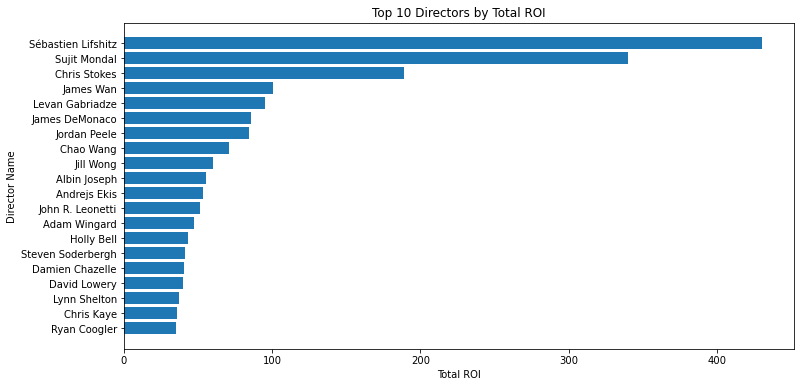

In [49]:
dir_df =last_df[last_df['director_name'] != '0']
director_roi = dir_df.groupby('director_name')['ROI'].sum().reset_index()
director_graph = director_roi.sort_values(by='ROI', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.barh(director_graph['director_name'], director_graph['ROI'])
plt.xlabel('Total ROI')
plt.ylabel('Director Name')
plt.title('Top 10 Directors by Total ROI')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

We can see some famous directors like Ryan COogler, Jordan Peele, and James Wan up there!

Now let's see if there is a sweetspot for runtime yielding the best ROI.

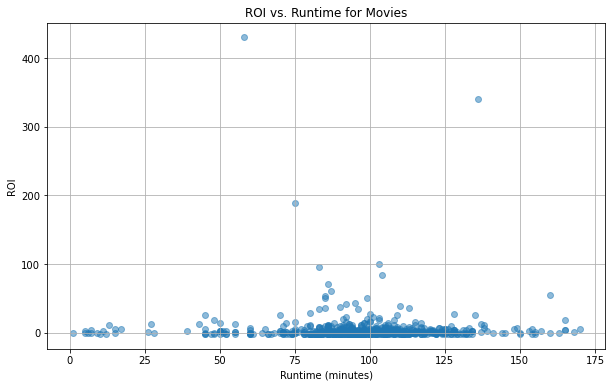

In [50]:
runtime_df = last_df[last_df['runtime_minutes'] != 0]
plt.figure(figsize=(10, 6))
plt.scatter(runtime_df['runtime_minutes'], runtime_df['ROI'], alpha=0.5)
plt.xlabel('Runtime (minutes)')
plt.ylabel('ROI')
plt.title('ROI vs. Runtime for Movies')
plt.grid(True)
plt.show()


Looks like 90-100 minutes is about the best length for movies in terms of financial success.


Let's see if ROI has been increasing or decreasing based on yearly trends.

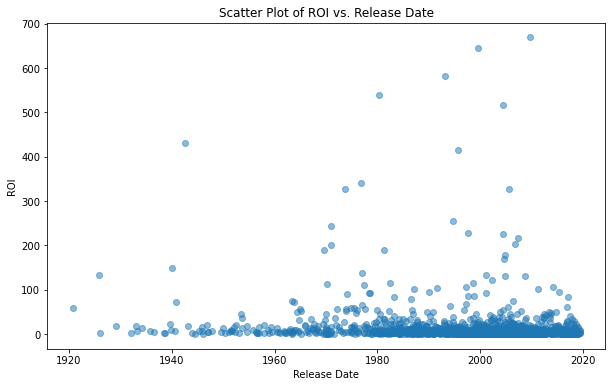

In [51]:
ROI_df = last_df[(last_df['ROI'] > 0) & (last_df['ROI'] < 3000)]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Release Date')
plt.show()


Im definitely seeing some more high ROI films being produced lately.  That could lead us to believe that maybe higher budgets found in newer movies yields higher returns.

Let's take a look at some trends.  Maybe a specific genre has gotten really popular lately?  Maybe we can learn more by looking at all of the different genre's?

In [52]:
# Select the 'genre_ids' column and use .unique() to view the unique values
last_df['genres'].unique()


array(['Biography,Comedy,Drama', 'Comedy,Drama,Romance',
       'Biography,Documentary', 'Drama,War', 'Family', 'Drama,Romance',
       'Drama,Thriller', 'Comedy,Horror,Sci-Fi', 'Action,Crime,Drama',
       'Comedy,Crime', 'Drama,Fantasy,Horror', 'Drama',
       'Adventure,Biography,Documentary', 'Documentary', 0, 'War',
       'Action,Comedy,Drama', 'Action,Adventure,Sci-Fi',
       'Comedy,Horror,Thriller', 'Crime,Drama,Thriller',
       'Crime,Drama,Mystery', 'Horror', 'Comedy', 'Action,Crime,Fantasy',
       'Documentary,Drama,Sport', 'Adventure', 'Crime,Horror,Mystery',
       'Mystery,Sci-Fi,Thriller', 'Biography,Drama,Romance', 'Thriller',
       'Horror,Thriller', 'Documentary,Drama,War', 'Fantasy',
       'Comedy,Drama', 'Adventure,Family,Fantasy', 'Drama,History,War',
       'Biography,Crime,Drama', 'Drama,Horror', 'Action,Drama,Thriller',
       'Comedy,Drama,Horror', 'Comedy,Mystery,Sci-Fi', 'Adventure,Drama',
       'Music', 'Drama,Romance,War', 'Drama,Horror,Mystery',
   

O wow, that's messy.  It looks like when movies have multiple genres that conglomeration of genre's becomes it's own genre-according to our df.  Let's blow up those groupings.

We can use the str.split function to break all of the combined genre's up and then we will make a new row for each genre of a movie.  This will give us "duplicate movies" but we know this is simply for analysis of the genres.

In [53]:
# Split combined genres into separate rows
last_df['genres'] = last_df['genres'].str.split(',')

# Explode the DataFrame to create multiple rows for each movie with a single genre
last_df_exploded = last_df.explode('genres')

print(last_df_exploded)


                              movie    director_name  runtime_minutes  \
0                        love ranch  Taylor Hackford            117.0   
0                        love ranch  Taylor Hackford            117.0   
0                        love ranch  Taylor Hackford            117.0   
1                     morning glory    Roger Michell            107.0   
1                     morning glory    Roger Michell            107.0   
...                             ...              ...              ...   
5759                         cavite                0              0.0   
5760                the mongol king                0              0.0   
5761                      following                0              0.0   
5762  return to the land of wonders                0              0.0   
5763              my date with drew                0              0.0   

         genres  average_rating release_date  production_budget  \
0     Biography             5.6   2010-06-30         250

Now we will see how many different genres there really are.

In [54]:
last_df_exploded['genres'].unique()


array(['Biography', 'Comedy', 'Drama', 'Romance', 'Documentary', 'War',
       'Family', 'Thriller', 'Horror', 'Sci-Fi', 'Action', 'Crime',
       'Fantasy', 'Adventure', nan, 'Mystery', 'Sport', 'History',
       'Music', 'Western', 'Musical', 'News', 'Animation'], dtype=object)

## Data Analysis

Now to the fun part!

We can begin to make some visuals that will help us identify trends in ROI, Budget,Now that we have the genres cleaned up. we can analyze some trends based on release date.  Let's look at Gross, Profit, and ROI.  While we're here, let's take a look at some extraneous variables like release date and genre.

1st up, let's take a look at the total gross (and ROI) when compared to the release date for movies within a specific genre.

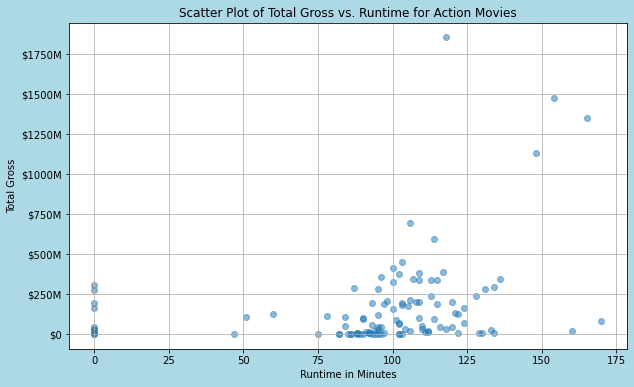

In [55]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Action'))]

def format_y_axis(value, tick_number):
    if value >= 1e6:  # If value is in millions
        return f'${value/1e6:.0f}M'
    elif value >= 1e3:  # If value is in thousands
        return f'${value/1e3:.0f}K'
    else:  # If value is less than 1,000
        return f'${value:.0f}'
    
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Action Movies')
plt.grid(True)  # Add grid lines for better visualization
#plt.show()


plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_y_axis))

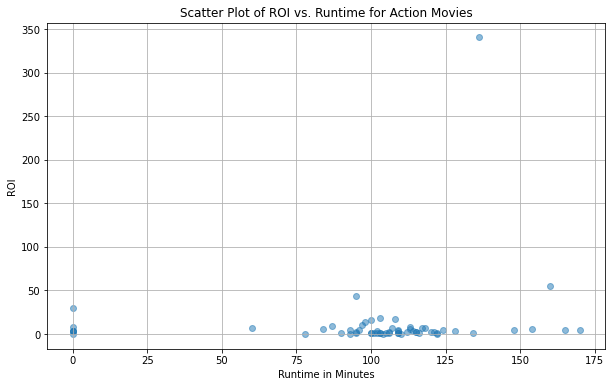

In [56]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Action'))]


plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Action Movies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()

#plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_y_axis))

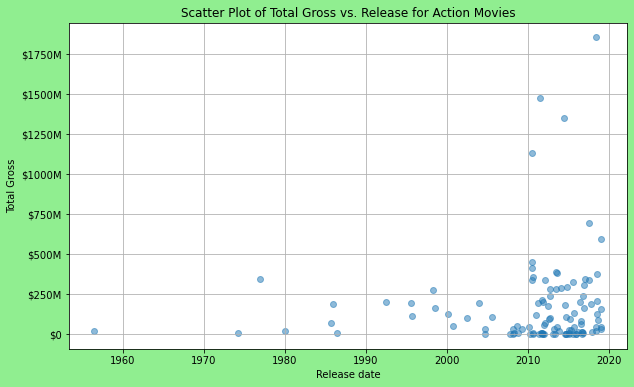

In [57]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Action'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release for Action Movies')
plt.grid(True)  # Add grid lines for better visualization
#plt.show()


plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_y_axis))

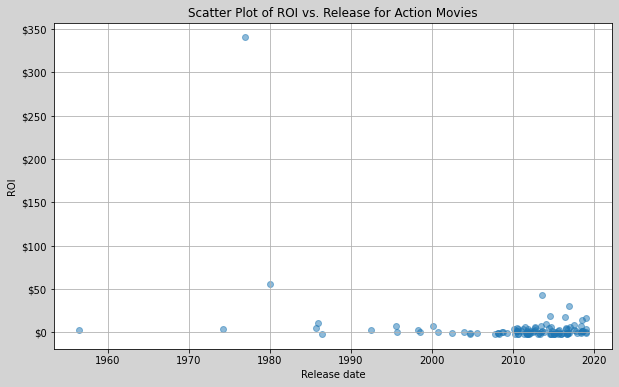

In [58]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Action'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release date')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Release for Action Movies')
plt.grid(True)  # Add grid lines for better visualization
#plt.show()


plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_y_axis))

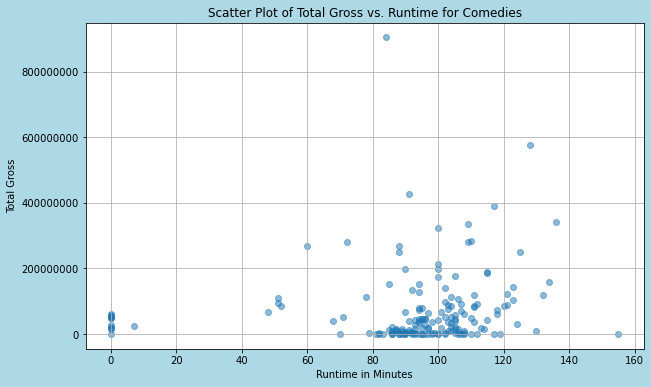

In [59]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Comedy'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Comedies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


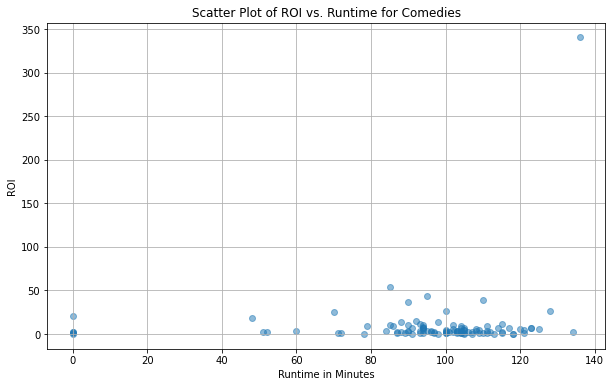

In [60]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Comedy'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Comedies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()



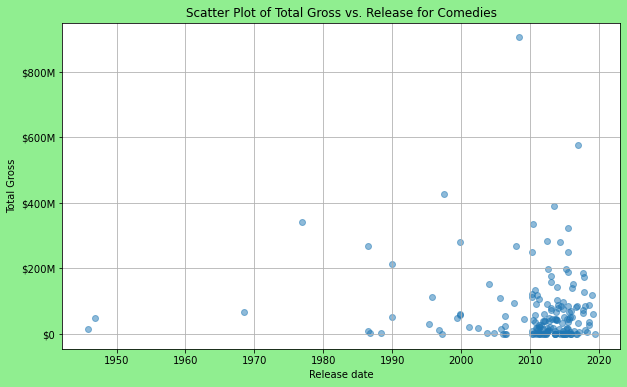

In [61]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Comedy'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release for Comedies')
plt.grid(True)  # Add grid lines for better visualization
#plt.show()


plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_y_axis))

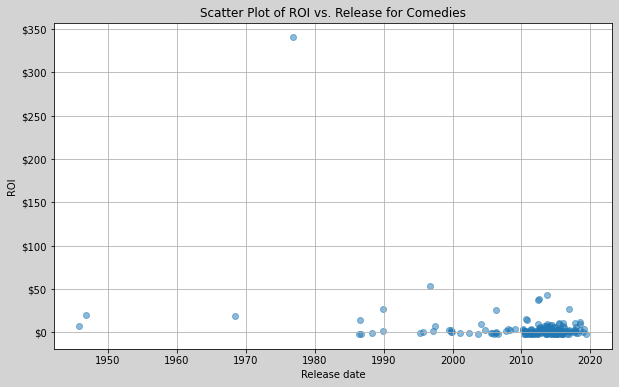

In [62]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Comedy'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release date')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Release for Comedies')
plt.grid(True)  # Add grid lines for better visualization
#plt.show()


plt.gca().get_yaxis().set_major_formatter(FuncFormatter(format_y_axis))

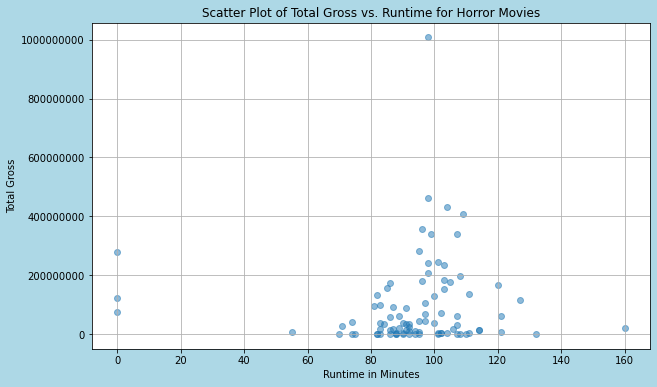

In [63]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Horror'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Horror Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


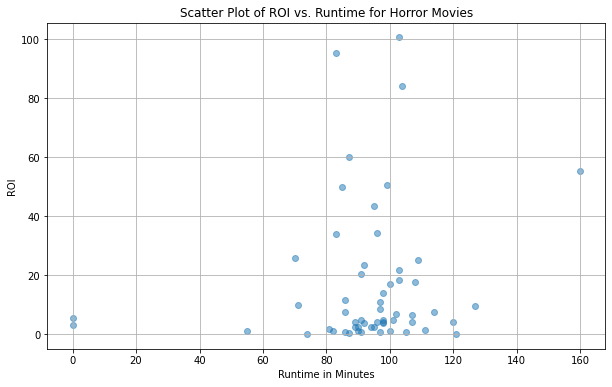

In [64]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Horror'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Horror Movies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()



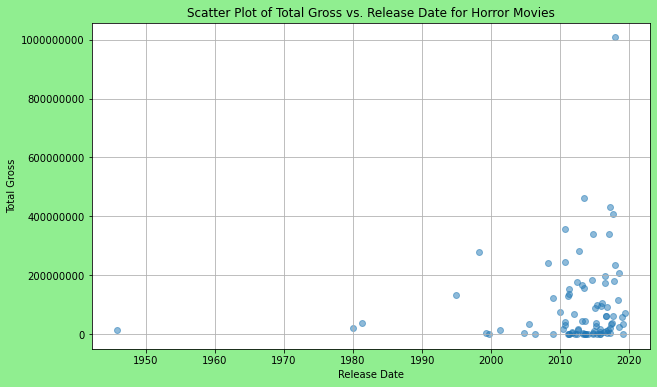

In [65]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Horror'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Horror Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


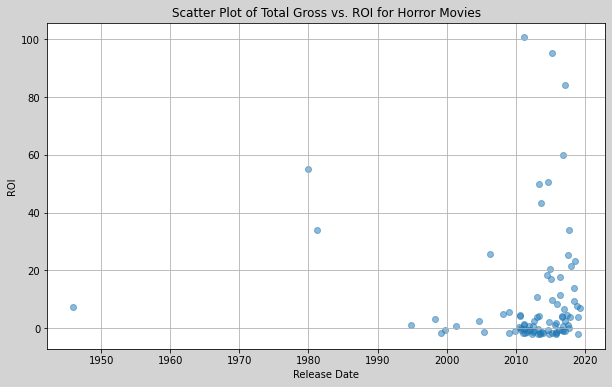

In [66]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Horror'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of Total Gross vs. ROI for Horror Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


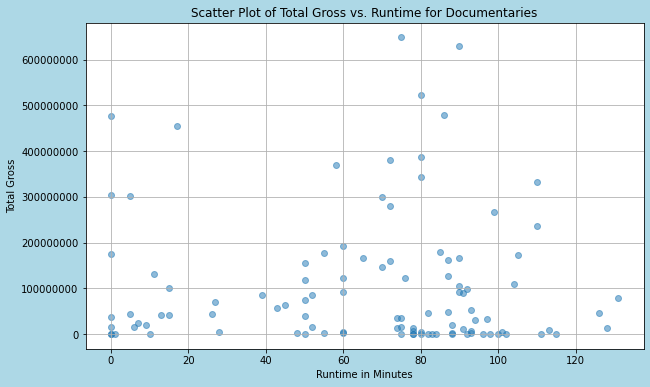

In [67]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Documentary'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Documentaries')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


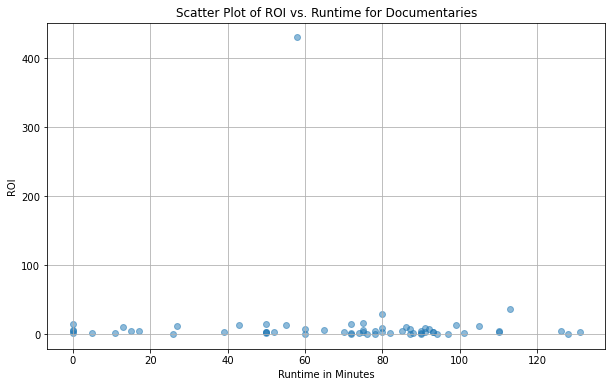

In [68]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Documentary'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Documentaries')
plt.grid(True)  # Add grid lines for better visualization
plt.show()



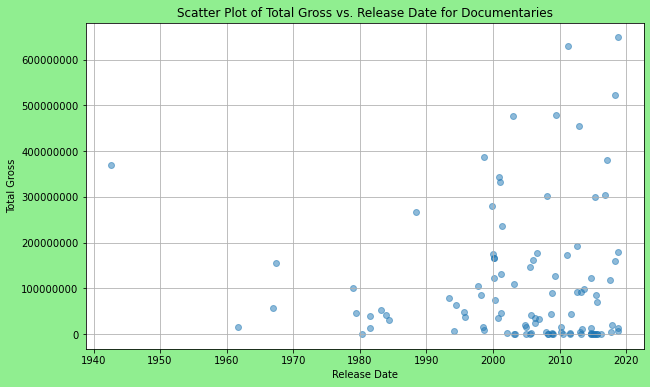

In [69]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Documentary'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Documentaries')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


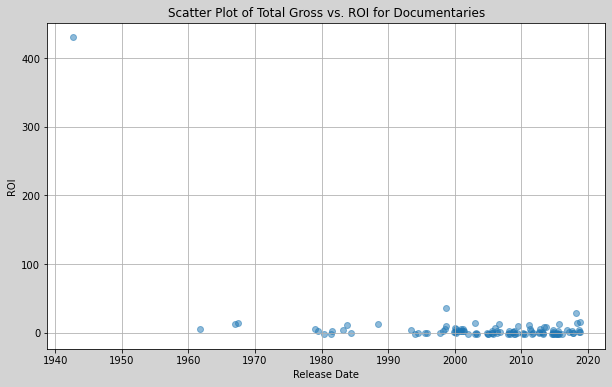

In [70]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Documentary'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of Total Gross vs. ROI for Documentaries')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

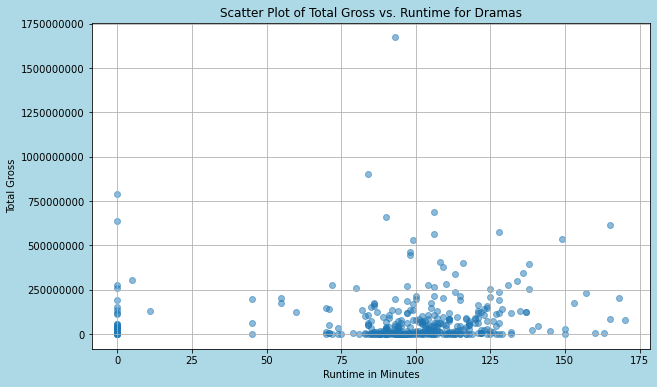

In [71]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Drama'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Dramas')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


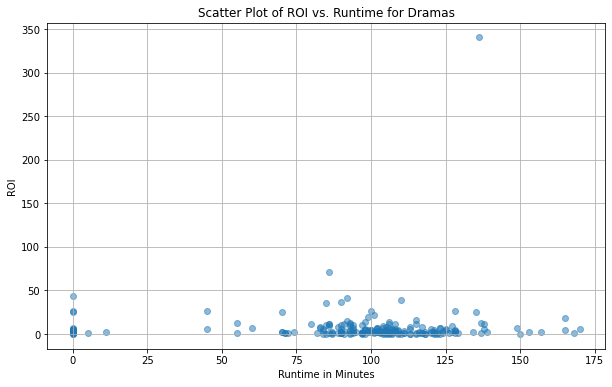

In [72]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Drama'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Dramas')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


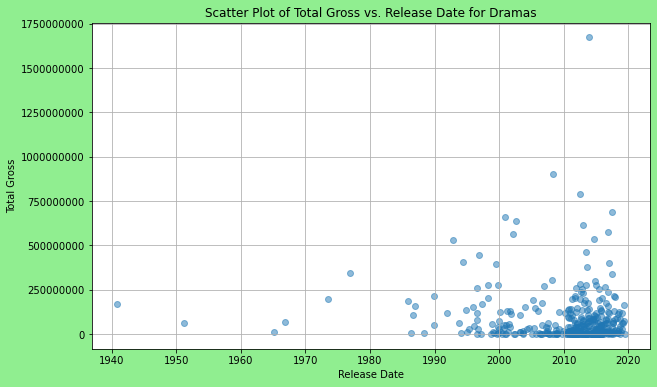

In [73]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Drama'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Dramas')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

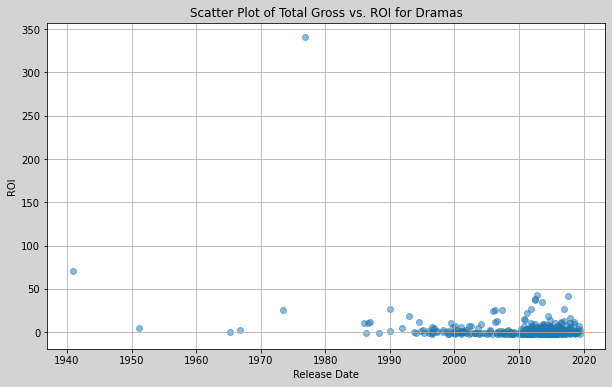

In [74]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Drama'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of Total Gross vs. ROI for Dramas')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

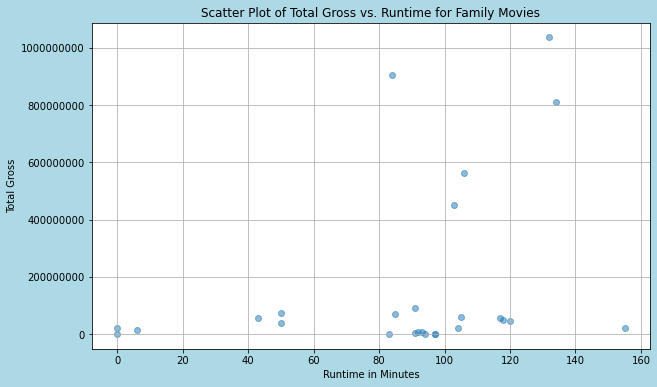

In [75]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Family'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Family Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


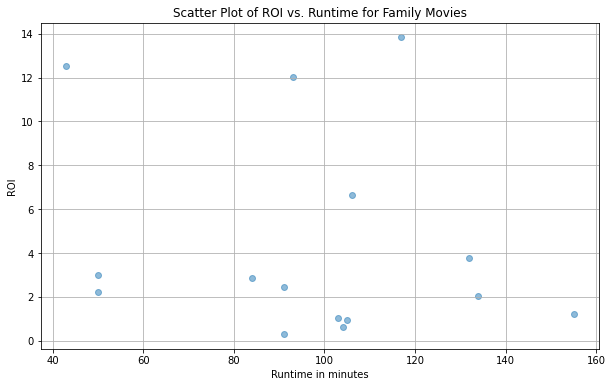

In [76]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Family'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Family Movies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


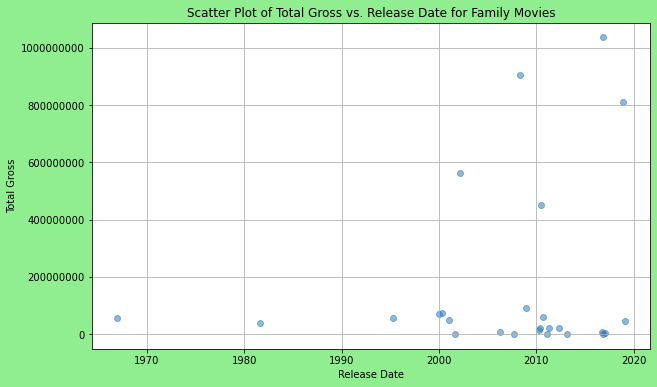

In [77]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Family'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Family Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

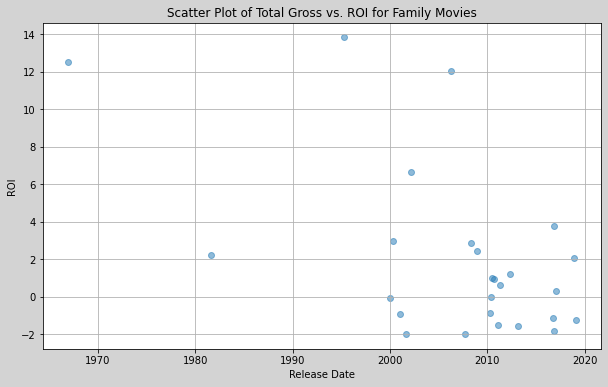

In [78]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Family'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of Total Gross vs. ROI for Family Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

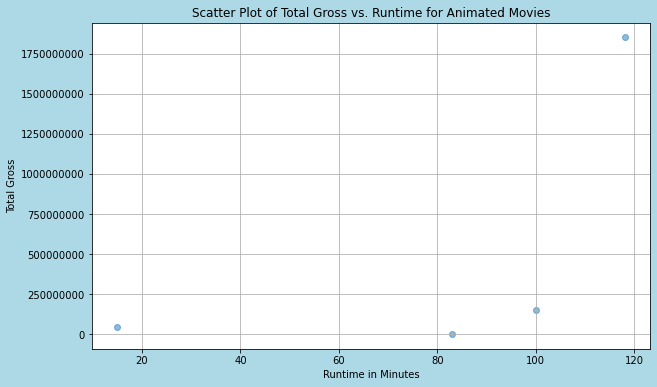

In [79]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Animation'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Animated Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


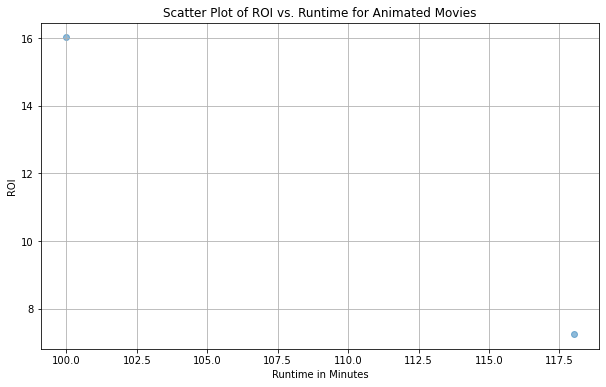

In [80]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Animation'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Animated Movies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


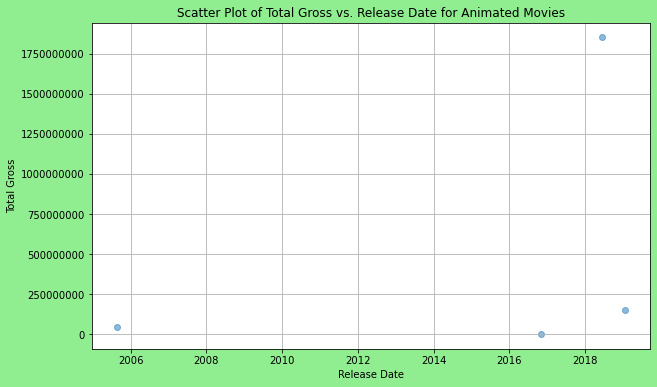

In [81]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Animation'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Animated Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

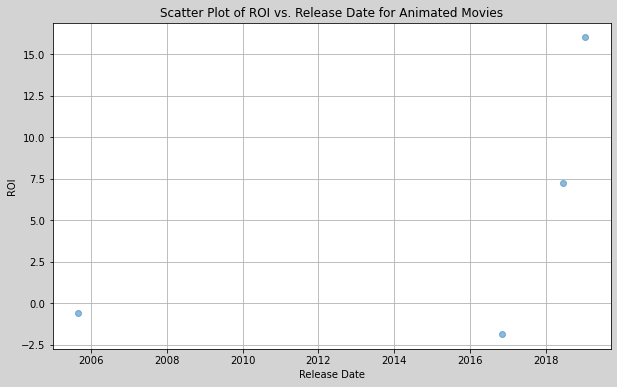

In [82]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Animation'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Release Date for Animated Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

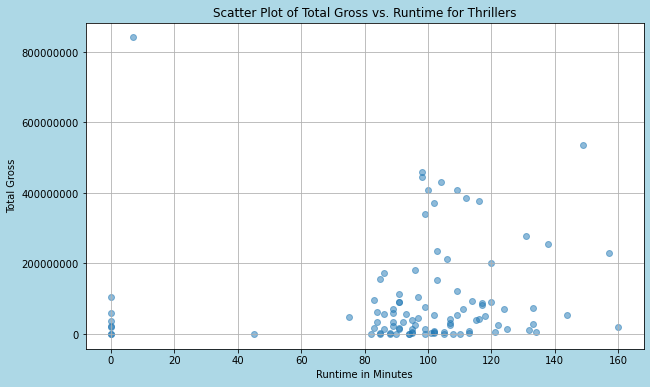

In [83]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Thriller'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Thrillers')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


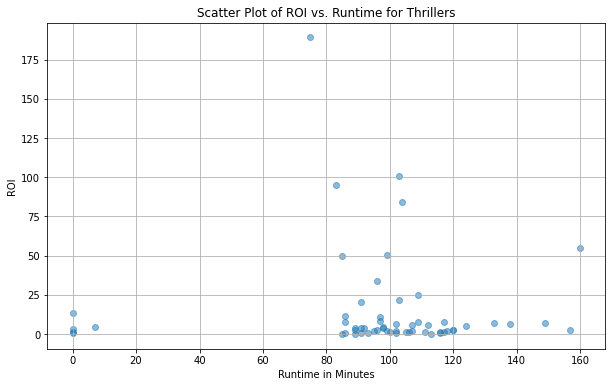

In [84]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Thriller'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Thrillers')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


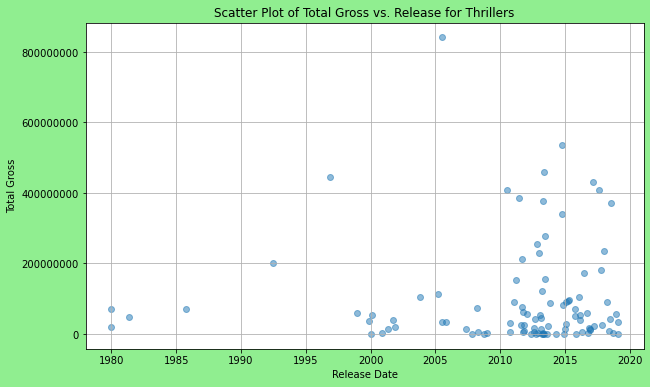

In [85]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Thriller'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release for Thrillers')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

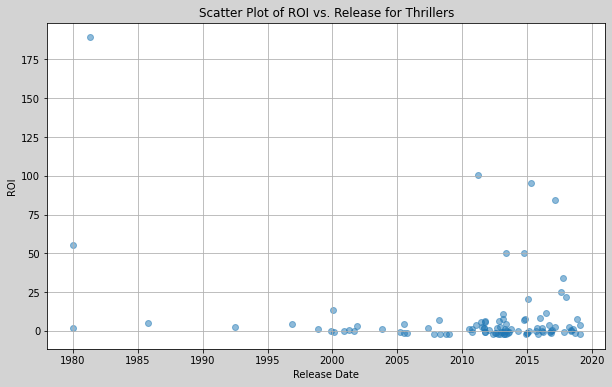

In [86]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Thriller'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Release for Thrillers')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

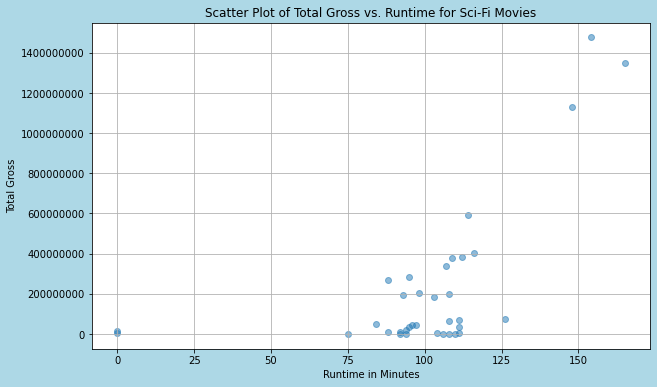

In [87]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Sci-Fi'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Sci-Fi Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


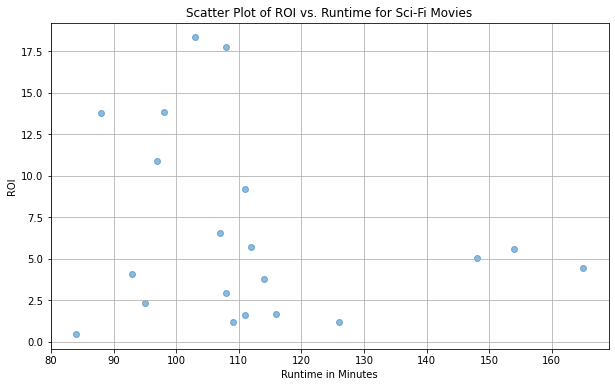

In [88]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Sci-Fi'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Sci-Fi Movies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


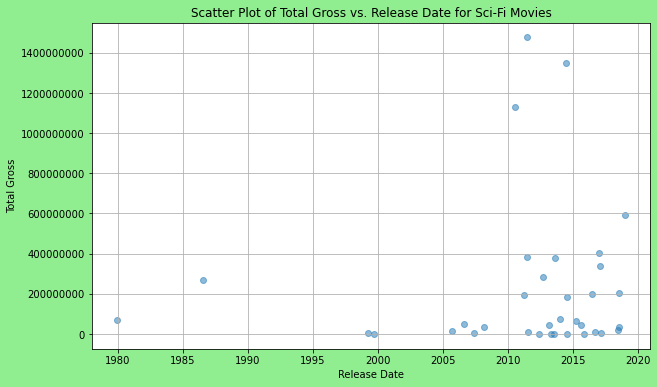

In [89]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Sci-Fi'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Sci-Fi Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


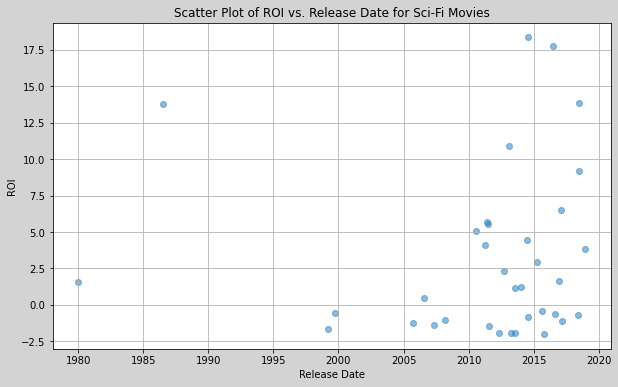

In [90]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Sci-Fi'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Release Date for Sci-Fi Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


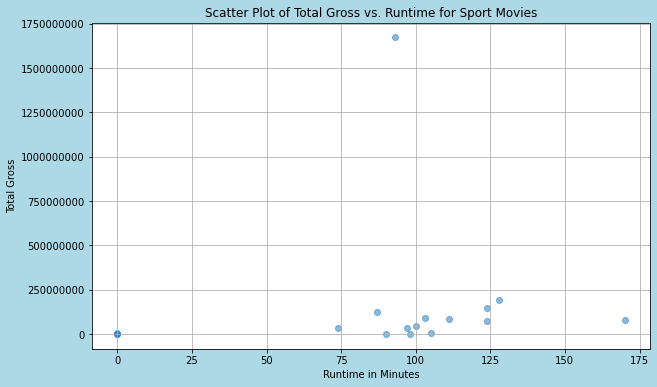

In [91]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Sport'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Sport Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


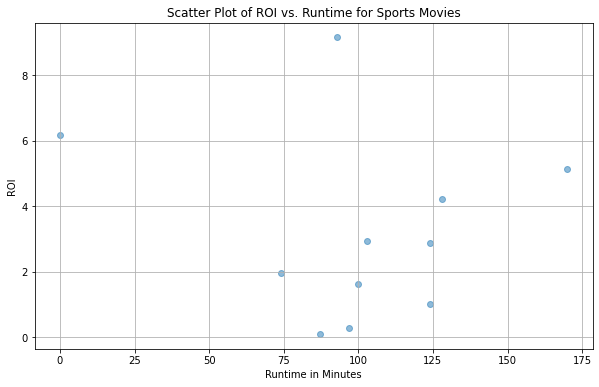

In [92]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Sport'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Sports Movies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


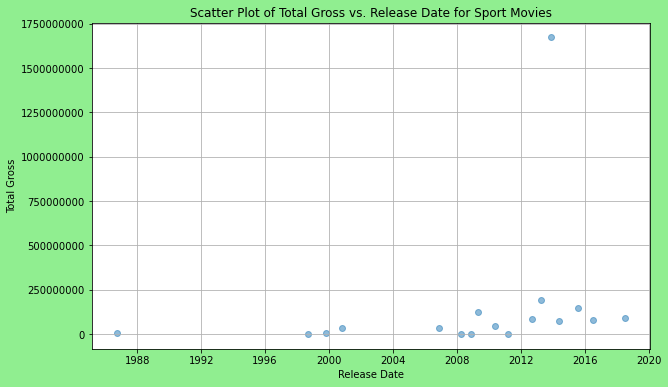

In [93]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Sport'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Sport Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

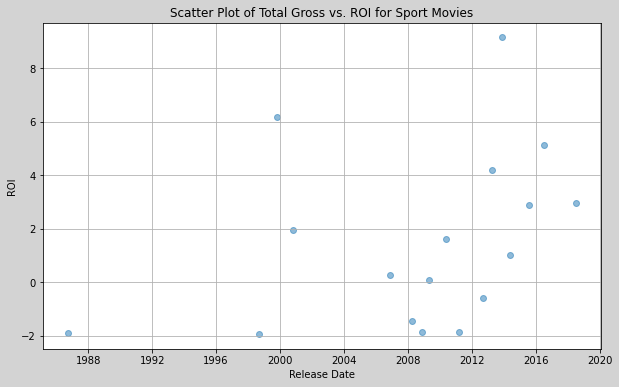

In [94]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Sport'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of Total Gross vs. ROI for Sport Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()

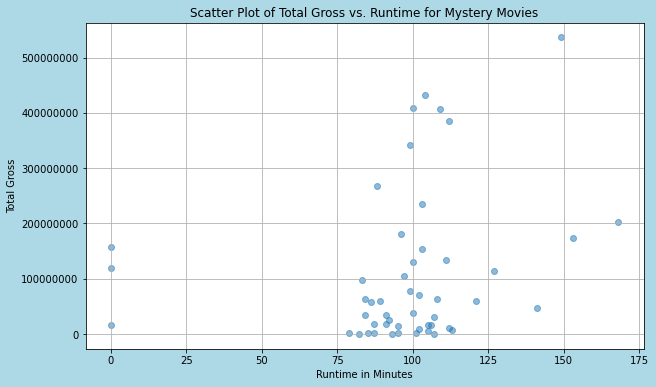

In [95]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Mystery'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Mystery Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


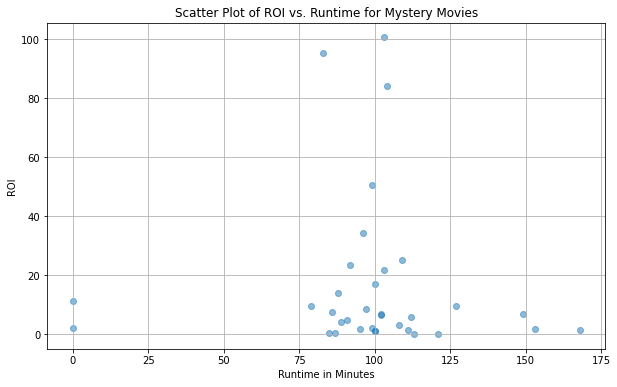

In [96]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Mystery'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Mystery Movies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


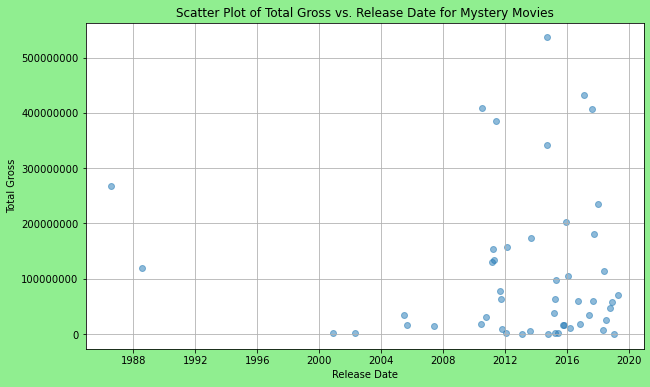

In [97]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Mystery'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Mystery Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


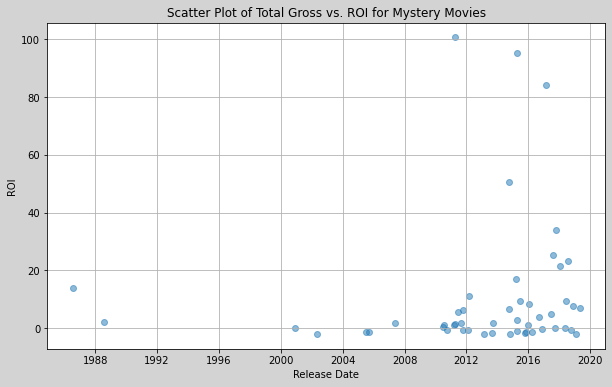

In [98]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Mystery'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of Total Gross vs. ROI for Mystery Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


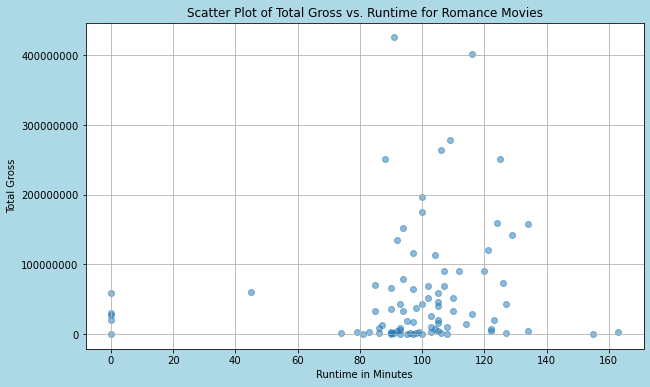

In [99]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Romance'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightblue')
plt.scatter(ROI_df['runtime_minutes'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Runtime for Romance Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


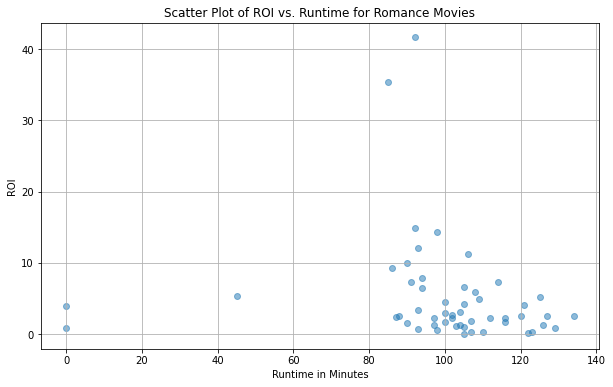

In [100]:
ROI_df = last_df_exploded[(last_df_exploded['ROI'] > 0) & (last_df_exploded['ROI'] < 3000) & (last_df_exploded['genres'].str.contains('Romance'))]

plt.figure(figsize=(10, 6))
plt.scatter(ROI_df['runtime_minutes'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Runtime in Minutes')
plt.ylabel('ROI')
plt.title('Scatter Plot of ROI vs. Runtime for Romance Movies')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


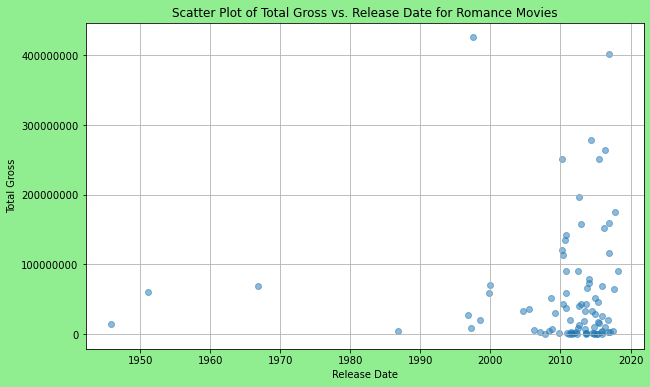

In [101]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Romance'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgreen')
plt.scatter(ROI_df['release_date'], ROI_df['total_gross'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Total Gross vs. Release Date for Romance Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


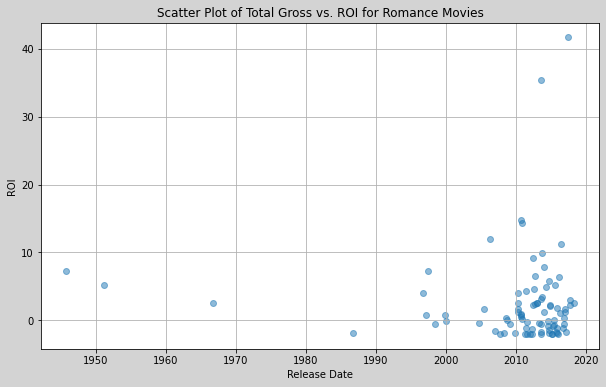

In [102]:
ROI_df = last_df_exploded[(last_df_exploded['total_gross'] > 0) & (last_df_exploded['genres'].str.contains('Romance'))]

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor('lightgrey')
plt.scatter(ROI_df['release_date'], ROI_df['ROI'], alpha=0.5)
plt.xlabel('Release Date')
plt.ylabel('ROI')
plt.title('Scatter Plot of Total Gross vs. ROI for Romance Movies')
plt.grid(True)  # Add grid lines for better visualization

# Format the y-axis ticks as plain decimal numbers
plt.ticklabel_format(style='plain', axis='y')

plt.show()


Ok, we were able to pick up on some trends.  ROI and gross tend to be growing for movies year over year, regardless of the genre.  We can safely assume the movie industry is growing!

Now let's construct a heatmap to verify in correlations.  We realize that newer movies are having higher Gross and ROI, but are there any other factors influencing increased Gross other than time?

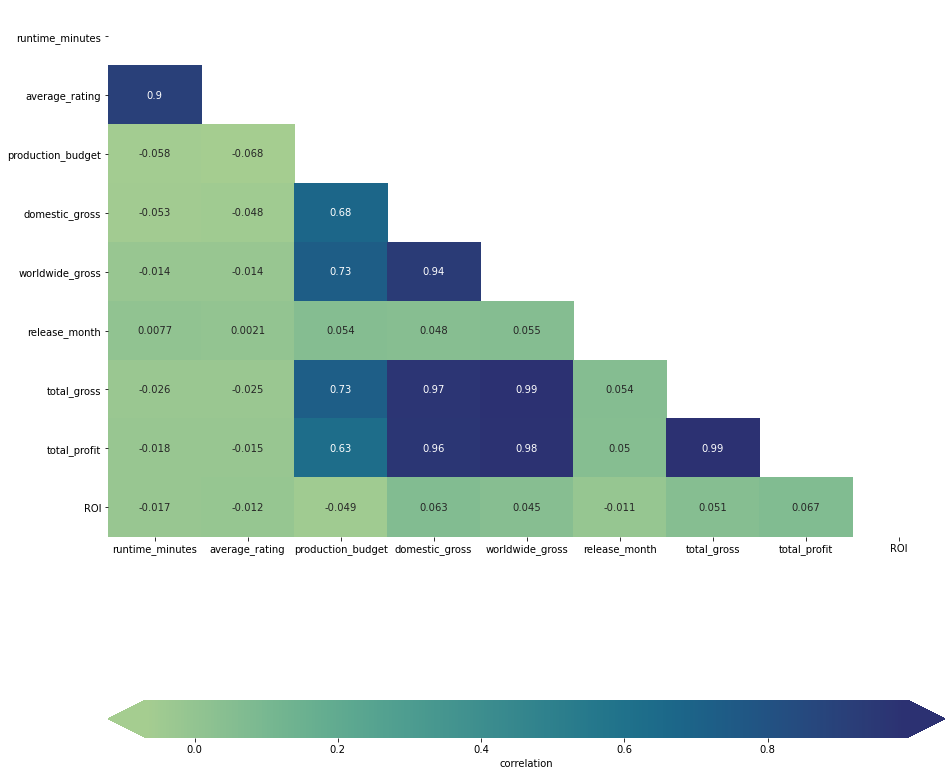

In [103]:
import seaborn as sns
heatmap_data = last_df_exploded
corr = heatmap_data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, mask=np.triu(corr), ax=ax, annot=True, cmap="crest",
            cbar_kws={'label':'correlation', 'orientation':'horizontal', 'pad':.2, 'extend':'both'});

Yes! There is a solid correlation between Total Gross, Total Profit, and Production Budget.

Now let's also check to see which Genre has the highest ROI.

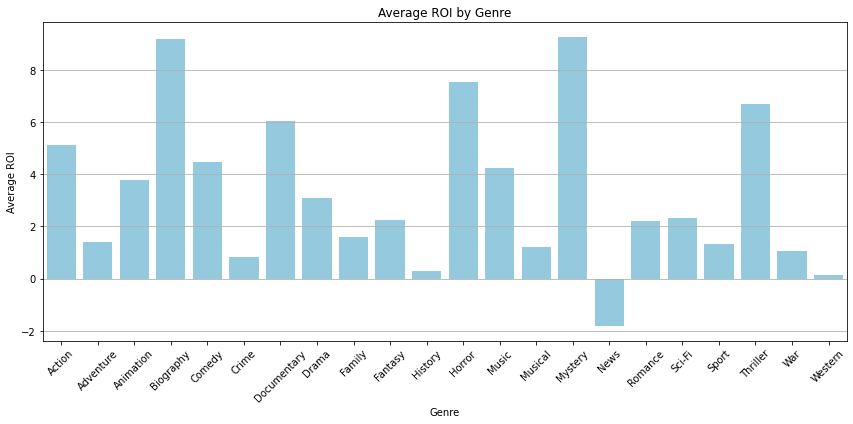

In [105]:
# Calculate average ROI for each genre
avg_roi_by_genre = last_df_exploded.groupby('genres')['ROI'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(data=avg_roi_by_genre, x='genres', y='ROI', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines if needed

# Show the plot
plt.tight_layout()
plt.show()

ROI isn't necessarily the most important thing we are looking for, but we can see that Biographies, Documentaries, Mysteries, and Thrillers have the highest ROI.  That could be because they have the lowest budgets on average though.  Let's check this furhter and examine profit for these genres.

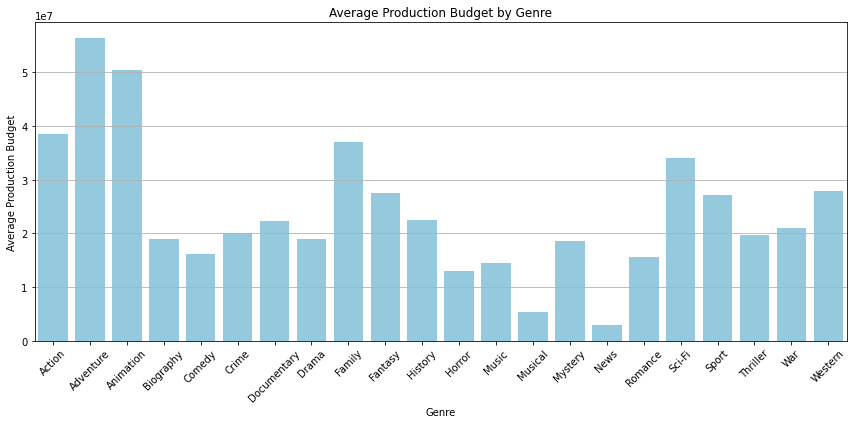

In [116]:
# Calculate average ROI for each genre
avg_roi_by_genre = last_df_exploded.groupby('genres')['production_budget'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(data=avg_roi_by_genre, x='genres', y='production_budget', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines if needed

# Show the plot
plt.tight_layout()
plt.show()

It's not overwhelmingly obvious, but the genres mentioned above do have average or below average budgets. We can see that Action, Adventure, and Animation movies have the largest budgets.  What do their profits looks like?

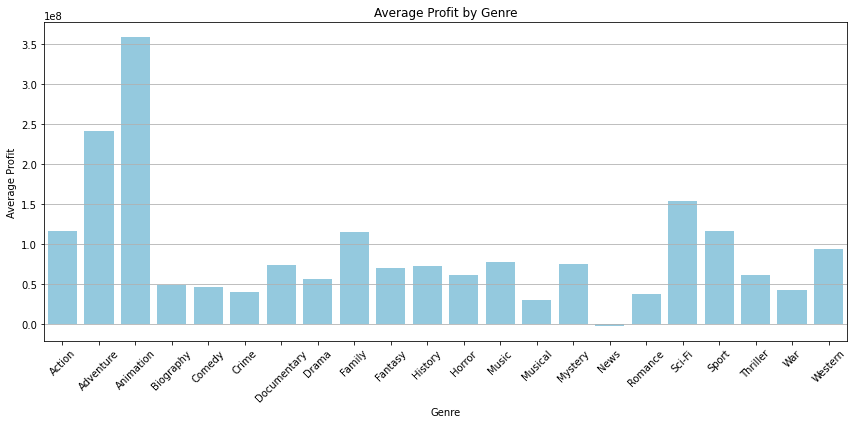

In [118]:
# Calculate average ROI for each genre
avg_roi_by_genre = last_df_exploded.groupby('genres')['total_profit'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.barplot(data=avg_roi_by_genre, x='genres', y='total_profit', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Profit')
plt.title('Average Profit by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines if needed

# Show the plot
plt.tight_layout()
plt.show()

Interesting!  Animation has the highest budget, followed by Adventure and Sci-Fi.  Intuitively, this makes sense.  Big action and animation movies with high CGI budgets are all the rage right now.

Let's take a look at how budgets impact the gross of the movie.

## Regression Analysis
let's take a look a the effects our budget and gross have on our profits and ROI.

First up is the comparison between budget and gross.  Based on our previous graphs, we can assume that the higher the budget, the higher the gross.

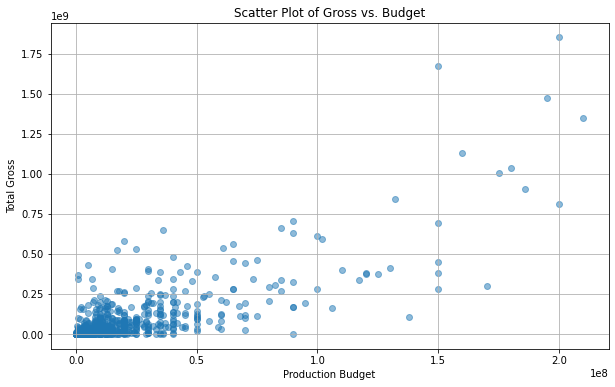

In [124]:
filtered_df = last_df[last_df['runtime_minutes'] > 0]

# Creating a scatter plot with filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['production_budget'], filtered_df['total_gross'], alpha=0.5)
plt.xlabel('Production Budget')
plt.ylabel('Total Gross')
plt.title('Scatter Plot of Gross vs. Budget')
plt.grid(True)  # Add grid lines for better visualization
plt.show()

In [125]:
#Importing and constructing the baseline model with the StatsModels library:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Suppressing future warnings that will occur during multiple regression models: 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Constructing the baseline model:
formula = 'production_budget ~ total_gross'
model = ols(formula=formula, data=filtered_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      production_budget   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          5.68e-144
Time:                        10:11:43   Log-Likelihood:                -12699.
No. Observations:                 697   AIC:                         2.540e+04
Df Residuals:                     695   BIC:                         2.541e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.876e+06   8.37e+05     10.605      0.000    7.23e+06    1.05e+07
total_gross     0.1338      0.004     32.922      0.000       0.126       0.142
==============================================================================
Omnibus:                      276.307   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2014.426
Skew:                           1.596   Prob(JB):                         0.00
Kurtosis:                      10.692   Cond. No.                     2.29e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This looks really good!  Solid R-Squared to confirm what we believe about this correlation.  Let's put a regression line on here to visualize it better.

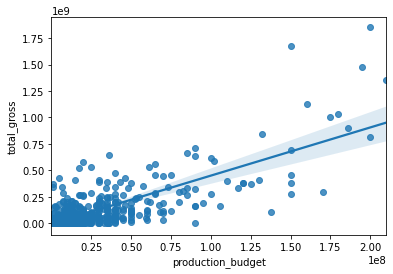

In [128]:
sns.regplot(x='production_budget', y='total_gross', data=filtered_df);

We can see that the budget is a great indicator of total gross.  The more money we spend on the movie, the more money the movie will bring in-in terms of revenue.

Now let's take a look at the relationship between budget a profit.  It should be similar to budget and gross, but let's double check.

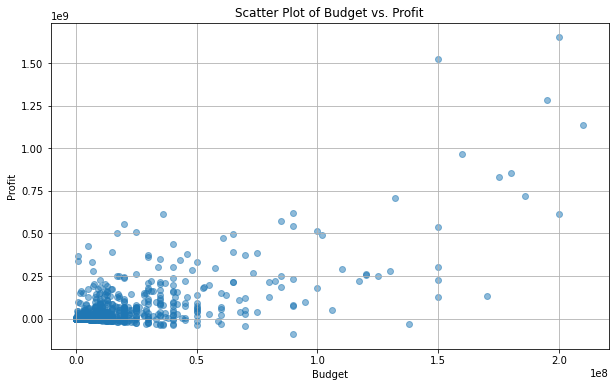

In [120]:
filtered_df = last_df[last_df['runtime_minutes'] > 0]

# Creating a scatter plot with filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['production_budget'], filtered_df['total_profit'], alpha=0.5)
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Scatter Plot of Budget vs. Profit')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


This looks like a solid indiaction as well.  Not as strong as our previous regression, but still-this looks promising.  Let's analyze it further.

In [111]:
#Importing and constructing the baseline model with the StatsModels library:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Suppressing future warnings that will occur during multiple regression models: 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Constructing the baseline model:
formula = 'total_profit ~ production_budget'
model = ols(formula=formula, data=filtered_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_profit   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     660.0
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          7.56e-103
Time:                        09:36:11   Log-Likelihood:                -13928.
No. Observations:                 697   AIC:                         2.786e+04
Df Residuals:                     695   BIC:                         2.787e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.902e+06   5.26e+06     -0.932      0.351   -1.52e+07    5.42e+06
production_budget     3.5525      0.138     25.690      0.000       3.281       3.824
==============================================================================
Omnibus:                      424.699   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9738.588
Skew:                           2.287   Prob(JB):                         0.00
Kurtosis:                      20.732   Cond. No.                     4.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ok, great R-Squared of .487.  We can see a lot of data points at the botton left hand side of the chart and more appear as we move up the chart to the right side.  This indicates a positive correlation!  This is also just a slightly smaller effect than we saw from the comparison of budget and gross.  Makes total sense!

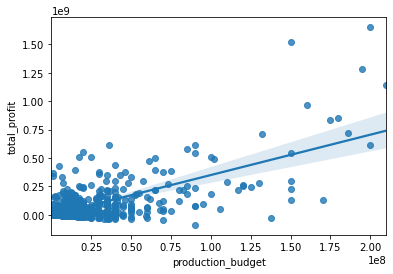

In [112]:
sns.regplot(x='production_budget', y='total_profit', data=filtered_df);

Now let's look at the gross compared to the profit.  Since profit is essentially measure of gross, we should see a strong correlation.

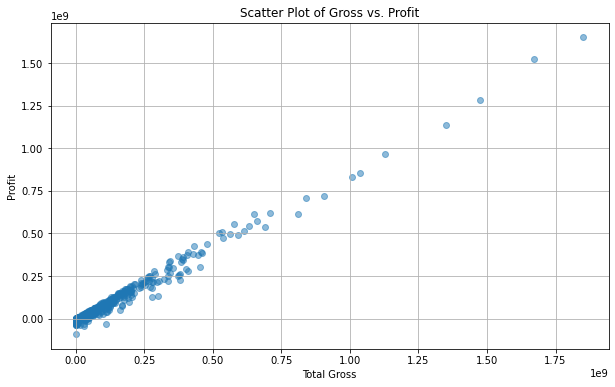

In [107]:
filtered_df = last_df[last_df['runtime_minutes'] > 0]

# Creating a scatter plot with filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['total_gross'], filtered_df['total_profit'], alpha=0.5)
plt.xlabel('Total Gross')
plt.ylabel('Profit')
plt.title('Scatter Plot of Gross vs. Profit')
plt.grid(True)  # Add grid lines for better visualization
plt.show()


We are seeing a very tight regression here!  Now we can certianly conlclude that Profit is related to gross.

In [108]:
#Importing and constructing the baseline model with the StatsModels library:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Suppressing future warnings that will occur during multiple regression models: 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Constructing the baseline model:
formula = 'total_profit ~ total_gross'
model = ols(formula=formula, data=filtered_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_profit   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 4.539e+04
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:36:10   Log-Likelihood:                -12699.
No. Observations:                 697   AIC:                         2.540e+04
Df Residuals:                     695   BIC:                         2.541e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.876e+06   8.37e+05    -10.605      0.000   -1.05e+07   -7.23e+06
total_gross     0.8662      0.004    213.059      0.000       0.858       0.874
==============================================================================
Omnibus:                      276.307   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2014.426
Skew:                          -1.596   Prob(JB):                         0.00
Kurtosis:                      10.692   Cond. No.                     2.29e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Wow, huge R-squared here!  This is almost a perfect correlation!  We can safely assume that gross is a direct indicator of profit.  This narrative fits in well with the trend of big blockbuster movies we see more and more of each year.

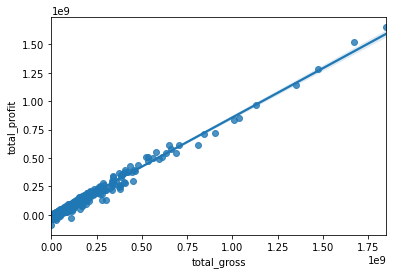

In [109]:
sns.regplot(x='total_gross', y='total_profit', data=filtered_df);

Beautiful regrssion line here.

Let's look at budget vs profit.  This will be a better indicator of what our studio can control to perform better.  We already know that the higher the worldwide gross, the better chance we have of big profits and therefore big returns.

In [117]:
# Filtering out rows where 'runtime_minutes' is greater than 0
#filtered_df = last_df[last_df['runtime_minutes'] > 0]

# Creating a scatter plot with filtered data
#plt.figure(figsize=(10, 6))
#plt.scatter(filtered_df['total_gross'], filtered_df['runtime_minutes'], alpha=0.5)
#plt.xlabel('Total Gross')
#plt.ylabel('Runtime in Minutes')
#plt.title('Scatter Plot of ROI vs. Runtime')
#plt.grid(True)  # Add grid lines for better visualization
#plt.show()


